In [23]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import json
import requests
import time
from citipy import citipy
from resources import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [25]:
# cities = ["Paris", "London", "Oslo", "Beijing"]

In [26]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&q="
response = requests.get(query_url + city + "&units=" + "imperial").json()

#test output to see API structure
#API day 3, activity 4
# test_url = query_url + "London"
# print(test_url)

In [39]:
#Perform a weather check on each of the cities using a series of successive API calls.
#API day 3, activity 4
#API Unit Day 2, Activity 5

# set up lists to hold reponse info
city_clean = []
number = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []

print('Beginning Data Retrieval')
loop_counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    #assemble url and make API request
    response = requests.get(query_url + city + "&units=" + "imperial").json()
    
    loop_counter = loop_counter + 1

    try:
        print(f'Processing Record {loop_counter} | {city}')
        #check for complete data
        lat_temp = response["coord"]["lat"]
        lon_temp = response["coord"]["lon"]
        temp_temp = response['main']['temp']
        humid_temp = response["main"]['humidity']
        cloud_temp = response['clouds']['all']
        wind_temp = response['wind']['speed']
        
        #add data to lists
        city_clean.append(city)
        lat.append(lat_temp)
        lon.append(lon_temp)
        temp.append(temp_temp)
        humid.append(humid_temp)
        cloud.append(cloud_temp)
        wind.append(wind_temp)
    
    except (KeyError):
        print("City not found. Skipping...")
        
    print("------------")

Beginning Data Retrieval
Processing Record 1 | jamestown
------------
Processing Record 2 | tasiilaq
------------
Processing Record 3 | busselton
------------
Processing Record 4 | ha noi
------------
Processing Record 5 | klaksvik
------------
Processing Record 6 | dhidhdhoo
------------
Processing Record 7 | hobart
------------
Processing Record 8 | sillod
------------
Processing Record 9 | port alfred
------------
Processing Record 10 | dingle
------------
Processing Record 11 | georgetown
------------
Processing Record 12 | indramayu
------------
Processing Record 13 | samusu
City not found. Skipping...
------------
Processing Record 14 | cape town
------------
Processing Record 15 | avarua
------------
Processing Record 16 | mercedes
------------
Processing Record 17 | atuona
------------
Processing Record 18 | eirunepe
------------
Processing Record 19 | baranain
------------
Processing Record 20 | barrow
------------
Processing Record 21 | cidreira
------------
Processing Record

Processing Record 170 | jacareacanga
------------
Processing Record 171 | alofi
------------
Processing Record 172 | mahebourg
------------
Processing Record 173 | saskylakh
------------
Processing Record 174 | brisbane
------------
Processing Record 175 | grande prairie
------------
Processing Record 176 | zyryanka
------------
Processing Record 177 | gusinoye ozero
------------
Processing Record 178 | capanema
------------
Processing Record 179 | paita
------------
Processing Record 180 | uwayl
City not found. Skipping...
------------
Processing Record 181 | linxia
------------
Processing Record 182 | sibolga
------------
Processing Record 183 | mareeba
------------
Processing Record 184 | tondano
------------
Processing Record 185 | sitka
------------
Processing Record 186 | pochutla
------------
Processing Record 187 | rungata
City not found. Skipping...
------------
Processing Record 188 | selma
------------
Processing Record 189 | cabo san lucas
------------
Processing Record 190

Processing Record 338 | alta floresta
------------
Processing Record 339 | sofiysk
City not found. Skipping...
------------
Processing Record 340 | isangel
------------
Processing Record 341 | pio xii
------------
Processing Record 342 | shache
------------
Processing Record 343 | nizhniy ingash
------------
Processing Record 344 | nouadhibou
------------
Processing Record 345 | trindade
------------
Processing Record 346 | bulawayo
------------
Processing Record 347 | sao felix do xingu
------------
Processing Record 348 | hofn
------------
Processing Record 349 | teteles
------------
Processing Record 350 | pringsewu
------------
Processing Record 351 | mount hagen
------------
Processing Record 352 | halberstadt
------------
Processing Record 353 | sainte-savine
------------
Processing Record 354 | dong hoi
------------
Processing Record 355 | biltine
------------
Processing Record 356 | clones
------------
Processing Record 357 | anar darreh
City not found. Skipping...
------------

Processing Record 507 | tairua
------------
Processing Record 508 | saint-francois
------------
Processing Record 509 | beyneu
------------
Processing Record 510 | san pedro
------------
Processing Record 511 | taltal
------------
Processing Record 512 | chara
------------
Processing Record 513 | krasyliv
------------
Processing Record 514 | qostanay
------------
Processing Record 515 | vaitupu
City not found. Skipping...
------------
Processing Record 516 | sault sainte marie
------------
Processing Record 517 | ginir
------------
Processing Record 518 | moron
------------
Processing Record 519 | sento se
City not found. Skipping...
------------
Processing Record 520 | marawi
------------
Processing Record 521 | ostrovnoy
------------
Processing Record 522 | muktagachha
City not found. Skipping...
------------
Processing Record 523 | scottsburgh
City not found. Skipping...
------------
Processing Record 524 | taihe
------------
Processing Record 525 | krasnaya yaruga
------------
Proc

In [44]:
# create a data frame from lists
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind
}

# weather_data = pd.DataFrame(weather_dict)
# weather_data.head()
[len(weather_dict[x]) for x in weather_dict]

[637, 583, 583, 583, 583, 583, 583]

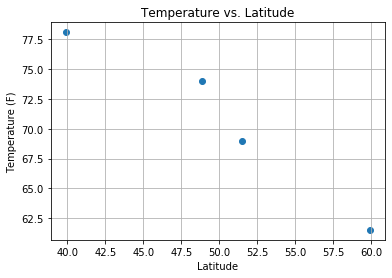

In [32]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

In [33]:
#observations

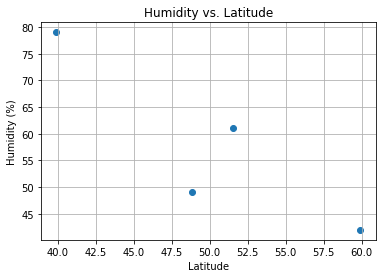

In [34]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLat.png")

In [35]:
#observations

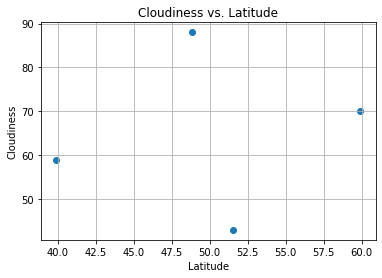

In [36]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLat.png")

In [37]:
#observations

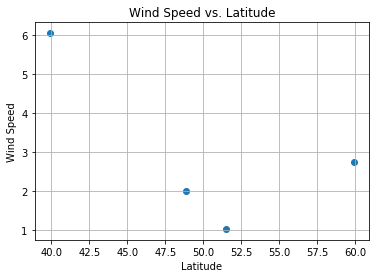

In [38]:
# Build a scatter plot for Wind Speed vs. Latitude
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

In [39]:
#observations

In [52]:
#Run linear regression on each relationship, only this time separating them into Northern Hemisphere 
#(greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
#Matplotlib Unit Day 3, Activity 8
# Northern Hemisphere - Temperature (F) vs. Latitude
#restrict data frame
weather_data_north = weather_data.loc[weather_data["lat"] >= 0]

#build scatter plot
plt.scatter(weather_data_north["lat"], weather_data_north["temp"], marker="o")

#add linear regression (make var names unique)
x_values = weather_data_north['lat']
y_values = weather_data_north['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show

# Save the figure
plt.savefig("TempVsLatRegress.png")

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,Paris,48.85,2.35,73.98,49,88,1.99
1,London,51.51,-0.13,68.99,61,43,1.01
2,Oslo,59.91,10.75,61.54,42,70,2.75
3,Beijing,39.91,116.40,78.08,79,59,6.06


In [41]:
# Southern Hemisphere - Temperature (F) vs. Latitude

In [42]:
# Northern Hemisphere - Humidity (%) vs. Latitude

In [43]:
# Southern Hemisphere - Humidity (%) vs. Latitude

In [44]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

In [45]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [46]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [47]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude